In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chisquare, chi2
data=pd.read_csv('r2z2.csv')
data

,X
0,-2.133170
1,-0.199993
2,-0.705577
3,1.856474
4,1.662697
...,...
94,-0.372597
95,-0.336904
96,-1.059356
97,-0.558967


In [2]:
data.describe()

,X
count,99.000000
mean,0.136178
std,1.105908
min,-3.593118
25%,-0.511563
50%,0.106019
75%,0.949182
max,2.449553


In [3]:
var_rad=data.sort_values(by='X')
var_rad

,X
44,-3.593118
7,-2.324996
69,-2.222661
0,-2.133170
79,-1.638093
...,...
3,1.856474
47,2.118333
26,2.281555
62,2.291488


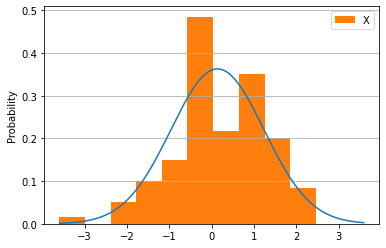

In [27]:
fig, ax = plt.subplots()
x=np.arange(-3.59,3.59, 0.001)
#data.plot.kde(ax=ax, legend=False)
plt.plot(x, norm.pdf(x,0.136,1.1))
data.plot.hist(density=True, ax=ax, width=0.61, align='mid')
ax.set_ylabel('Probability')
ax.grid(axis='y')

In [25]:
v0=[0,1,0,5,11,15,47,20,35,20,10,0]
inter=[];a1=-3.59;a2=-3
for i in range(10):
    inter.append([a1,a2])
    a1+=0.6; a2+=0.6
inter

[[-3.59, -3],
 [-2.9899999999999998, -2.4],
 [-2.3899999999999997, -1.7999999999999998],
 [-1.7899999999999996, -1.1999999999999997],
 [-1.1899999999999995, -0.5999999999999998],
 [-0.5899999999999995, 2.220446049250313e-16],
 [0.010000000000000453, 0.6000000000000002],
 [0.6100000000000004, 1.2000000000000002],
 [1.2100000000000004, 1.8000000000000003],
 [1.8100000000000005, 2.4000000000000004]]

In [12]:
nor=norm(0.136,1.10)
p0=[];p0.append(nor.pdf((-3.59 - 0.136)/1.10))
for i in range(len(inter)):
      p0.append(nor.pdf((inter[i][1] - 0.136)/1.10) - nor.pdf((inter[i][0] - 0.136)/1.10))
p0.append(1-nor.pdf((2.45 - 0.136)/1.10))
p0

[0.002146806692806252,
 0.006940551936005961,
 0.021595943518035596,
 0.050648841604352006,
 0.08739742969801906,
 0.1050411162803703,
 0.07358045513682954,
 -0.0027519377113991994,
 -0.07728368172087818,
 -0.10516331645047983,
 -0.08522182260195368,
 0.9267649006143842]

In [26]:
s=0
for i in range(12):
    s+=((v0[i] - 99*p0[i])**2)/99*p0[i]
s

77.29733652199009

In [24]:
#Критическая константа
chi2.ppf(0.99, 11)

24.724970311318277

In [26]:
1-chi2.cdf(78.8, df=11)

2.5167645745227674e-12

In [23]:
1-chi2.cdf(78.8, df=9)

2.7966517990307693e-13